<a href="https://colab.research.google.com/github/288756/VisArtificial/blob/master/cdatos_spacy_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del entorno


# Carga de datos

Carga el primer libro en una variable `str`.

In [1]:
!file /content/hp1

/content/hp1: Unicode text, UTF-8 text, with very long lines (995), with CRLF line terminators


In [2]:
corpus = ""
ruta_archivo = "/content/hp1"

with open(ruta_archivo, "r", encoding="utf8") as archivo:
  for i in range(15):
    archivo.readline()
  corpus = archivo.read().replace("\x97", "-")

print(corpus[3000:])

a arrojando los cereales contra las paredes. «Tunante», dijo entre dientes el señor Dursley mientras salía de la casa. Se metió en su coche y se alejó del número 4.
Al llegar a la esquina percibió el primer indicio de que sucedía algo raro: un gato estaba mirando un plano de la ciudad. Durante un segundo, el señor Dursley no se dio cuenta de lo que había visto, pero luego volvió la cabeza para mirar otra vez. Sí había un gato atigrado en la esquina de Privet Drive, pero no vio ningún plano. ¿En qué había estado pensando? Debía de haber sido una ilusión óptica. El señor Dursley parpadeó y contempló al gato. Éste le devolvió la mirada. Mientras el señor Dursley daba la vuelta a la esquina y subía por la calle, observó al gato por el espejo retrovisor: en aquel momento el felino estaba leyendo el rótulo que decía «Privet Drive» (no podía ser, los gatos no saben leer los rótulos ni los planos). El señor Dursley meneó la cabeza y alejó al gato de sus pensamientos. Mientras iba a la ciudad e

## Extracción de sentencias

Crea una lista de `str`, donde cada elemento se corresponda con una frase del libro.

In [3]:
# Importa spaCy
import spacy
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
# Crea un objeto nlp vacío para procesar español
nlp = spacy.load("es_core_news_md")

In [5]:
doc = nlp("Como Juan es fan de Harry Potter, quiere hacer un procesador de textos usando SpaCy que reconozca cosas como, por ejemplo, hechizos")

In [6]:
from spacy import displacy
displacy.render(doc, style="ent")

In [7]:
texto = "Imaginemos que este es el texto del libro. Y nosotros queremos dividirlo en frases. Porque vamos a considerar que cada frase es un documento."
doc = nlp(texto)

In [8]:
doc = nlp(corpus)
sentencias = list(doc.sents)
print(len(sentencias))

6469


In [9]:
for i, sent in enumerate(sentencias[20:100]):
  print(f"{i} -- {sent}")

0 -- Al llegar a la esquina percibió el primer indicio de que sucedía algo raro: un gato estaba mirando un plano de la ciudad.
1 -- Durante un segundo, el señor Dursley no se dio cuenta de lo que había visto, pero luego volvió la cabeza para mirar otra vez.
2 -- Sí había un gato atigrado en la esquina de Privet Drive, pero no vio ningún plano.
3 -- ¿En qué había estado pensando?
4 -- Debía de haber sido una ilusión óptica.
5 -- El señor Dursley parpadeó y contempló al gato.
6 -- Éste le devolvió la mirada.
7 -- Mientras el señor Dursley daba la vuelta a la esquina y subía por la calle, observó al gato por el espejo retrovisor: en aquel momento el felino estaba leyendo el rótulo que decía «Privet Drive» (no podía ser, los gatos no saben leer los rótulos ni los planos).
8 -- El señor Dursley meneó la cabeza y alejó al gato de sus pensamientos.
9 -- Mientras iba a la ciudad en coche no pensó más que en los pedidos de taladros que esperaba conseguir aquel día.

10 -- Pero en las afueras oc

In [10]:
type(sentencias[30])

spacy.tokens.span.Span

# ¿Qué personaje es el más nombrado?

Cuenta cuántas veces se nombra a Harry, Ron y Hermione de forma individual.

In [11]:
personajes = {
    "Harry": "#008000", # Verde esmeralda
    "Ron": "#ff4500", # Naranja rojizo
    "Hermione": "#4b0082", # Índigo
}

In [12]:
from os.path import split
from collections import Counter
contador_personajes = Counter(palabra for sentencia in sentencias for palabra in sentencia.text.split() if palabra in personajes)
contador_personajes

Counter({'Harry': 898, 'Ron': 216, 'Hermione': 159})

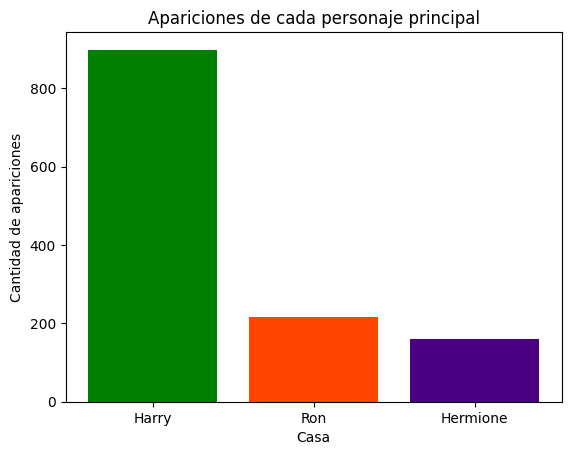

In [13]:
import matplotlib.pyplot as plt

# Etiquetas y valores para el gráfico
etiquetas = list(contador_personajes.keys())
valores = list(contador_personajes.values())

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=[personajes[personaje] for personaje in etiquetas])

# Añadir título y etiquetas a los ejes
plt.title("Apariciones de cada personaje principal")
plt.xlabel("Casa")
plt.ylabel("Cantidad de apariciones")

# Mostrar el gráfico
plt.show()

## Adjetivos más utilizados

In [14]:
adjetivos = [token.text for token in doc if token.pos_ == "ADJ"]

conteo_adjetivos = Counter(adjetivos)
conteo_adjetivos.most_common(10)

[('gran', 78),
 ('mejor', 71),
 ('primer', 42),
 ('siguiente', 42),
 ('primera', 40),
 ('nuevo', 35),
 ('seguro', 30),
 ('grande', 29),
 ('pequeño', 27),
 ('verde', 25)]

## Adjetivos más utilizados con cada personaje

In [15]:
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy.language import Language

nlp = spacy.load("es_core_news_md")
personajes_principales = ["Harry", "Ron", "Hermione"]
personajes_principales_patrones = nlp.pipe(personajes_principales)

matcher = PhraseMatcher(nlp.vocab)
matcher.add("PROTA", None, *personajes_principales_patrones)

@Language.component("detector_de_protagonistas")
def funcion_para_detectar_protagonistas(doc):
  # Aplicar el matcher al doc
  matches = matcher(doc)
  # Para cada coincidencia ceo un objeto span y en el doc principal identifico
  # que esa coincidencia es una entidad de tipo "PROTAGONISTA"
  spans = [Span(doc, start, end, "PROTAGONISTA") for match_id, start, end in matches]
  doc.ents = spans
  return doc

nlp.add_pipe("detector_de_protagonistas", before="ner")

<function __main__.funcion_para_detectar_protagonistas(doc)>

In [16]:
nlp.pipe_names

['tok2vec',
 'morphologizer',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'detector_de_protagonistas',
 'ner']

In [17]:
texto = "A Pepe, que es de Slytherin, no le caen demasiado bien Harry y Ron"
doc_test = nlp(texto)
displacy.render(doc_test, style="ent")

In [18]:
doc_con_protas = nlp(corpus)

In [19]:
displacy.render(doc_con_protas[1250:1500], style = "ent")

## Adjetivos más utilizados con cada personaje

In [20]:
adjetivos_personajes = {}
for personaje in ["Harry", "Ron", "Hermione"]:
  adjetivos_personajes[personaje] = []

In [21]:
for token in doc_con_protas:
  if token.pos_ == "ADJ":
    if token.head.ent_type == "PROTAGONISTA":
    #   print(f"{token.text} (ADJ) --> {token.head.text} / {token.head.ent_type}")
      adjetivos_personajes[token.head.text].append(token.text)

In [ ]:
conteo_adjetivos = {}
for personaje, adjetivo in adjetivos_personajes.items():
  conteo_adjetivos[personaje] = Counter(adjetivos)
conteo_adjetivos

# Fragmentación de textos

In [23]:
from spacy.matcher import Matcher

text = """Este es un texto con capítulos.

Capítulo 1: La introducción del libro... esto sería el título.

Este es el contenido del primer capítulo. Se trata de un texto que quiero que sea un poco largo para poder probar cosas de la asignatura que estamos cursando en uniovi para detectar entidades en textos.

Capítulo 2: El desarrollo

Y este es el contenido del segundo capítulo. Podemos referenciar al "Capítulo 1" porque su contenido fue interesante. Este la es más corto"""

nlp = spacy.load("es_core_news_md")
print(nlp.pipe_names)

matcher = Matcher(nlp.vocab)
patron = [{"TEXT": "Capítulo"}, {"IS_DIGIT": True}] #definir el patrón
matcher.add("CAPITULO", [patron])

doc = nlp(text)

coincidencias = matcher(doc)
print([doc[start:end] for match_id, start, end in coincidencias])


['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
[Capítulo 1, Capítulo 2, Capítulo 1]


In [24]:
displacy.render(doc, style="ent")

In [25]:
nlp = spacy.load("es_core_news_md")
config = {
    "overwrite_ents": True
}
ruler = nlp.add_pipe("entity_ruler", config = config)
patrones = [{"label": "CAPITULO", "pattern": [{"TEXT": "Capítulo"}, {"IS_DIGIT": True}]}]
ruler.add_patterns(patrones)

print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'entity_ruler']


In [26]:
doc = nlp(text)
displacy.render(doc, style="ent")

In [ ]:
text = """Este es un texto con capítulos.

1

El título del capítulo

Este es el contenido del capitulo que estamos intentando analizar. Su contenido será almacenado posteriormente así que estoy escribiendo una frase larga para poder analizarlo.

Capítulo 1: Escribo esto como si fuera un capítulo pero no lo es.

2

El título del segundo capítulo

De nuevo, este es el contenido del capitulo que estamos intentando analizar. Su contenido será almacenado posteriormente así que estoy escribiendo una frase larga para poder analizarlo.

22

Otro capítulo

Este capítulo tiene un número con más de un dígito así que a ver si funciona.
"""
patrones = [{"label": "CAPITULO", "pattern": [{"IS_DIGIT": True, "OP": +}, {"TEXT": {"REGEX": "\n"}}]}]


# Entrenamiento de modelo para pronosticar hechizos

In [ ]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span, DocBin
from spacy.tokenizer import Tokenizer
from spacy.util import compile_suffix_regex, compile_prefix_regex

nlp = spacy.load("es_core_news_md")
matcher = Matcher(nlp.vocab)

hechizos = ["Accio", "Aguamenti", "Alohomora", "Aparecium", "Avada Kedavra", "Colloportus",
            "Diffindo", "Engorgio", "Episkey", "Expelliarmus", "Ferula", "Impedimenta", "Incendio", "Lumos",
            "Nox", "Petrificus Totalus", "Protego", "Reparo", "Wingardium Leviosa"]

# Para crear tokenizers personalizados -----------------------------------------
# .. después de definir el objeto nlp y hacer los imports
prefix_re = compile_prefix_regex(nlp.Defaults.prefixes + ["-¡", "-", "\x97"])
suffix_re = compile_suffix_regex(nlp.Defaults.suffixes + ["-", "\x97"])
tokenizer = Tokenizer(nlp.vocab, prefix_search=prefix_re.search, suffix_search=suffix_re.search)
nlp.tokenizer = tokenizer
# .. ahora nos interesa crear el doc usando el pipeline con el tokenizer modificado

doc = nlp(corpus)
patron = [{"LOWER": {"IN": hechizos}}]
matcher.add("HECHIZO", [patron])
docs = []
for doc in nlp.pipe(doc.text):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    print(spans)
    doc.ents = spans
    docs.append(doc)

# # Comandos de consola necesarios para el entrenamaiento ------------------------
# # Inicializa el config
# !python -m spacy init config ./config.cfg --lang es --pipeline ner -F
# # Entrena usando los archivos proporcionados en los paths
# !python -m spacy train ./config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./test.spacy
# Crear un patrón para cada hechizo en la lista


# definir con ent: patron y aplicarlo al primer libro
# una vez train.spacy se puede entrenar el modelo
# cada instancia es una frase de tipo documento que tiene entidades


# Para crear conjuntos de entrenamiento usando una lista de docs ---------------
# siendo docs una lista de documentos que queremos utilizar para entrenar
doc_bin = DocBin(docs=docs)
doc_bin.to_disk("./train.spacy")

# Comandos de consola necesarios para el entrenamaiento ------------------------
# Inicializa el config
!python -m spacy init config ./config.cfg --lang es --pipeline ner -F
# Entrena usando los archivos proporcionados en los paths
!python -m spacy train ./config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./test.spacy

# # Algunos ejemplos de sentencias con entidades ---------------------------------
# sentences_with_entities = [
#     ("Alohomora abrió la puerta con un chasquido.", {"entities": [(0, 1, "HECHIZO")] }),
#     ("Alohomora y Lumos son hechizos básicos.", {"entities": [(0, 1, "HECHIZO"), (2, 3, "HECHIZO")] }),
#     ("Wingardium Leviosa levantó la pluma en el aire.", {"entities": [(0, 2, "HECHIZO")] }),
#     ("Petrificus Totalus dejó a su oponente inmóvil en el suelo.", {"entities": [(0, 2, "HECHIZO")] }),
#     ("Lumos iluminó el oscuro pasillo.", {"entities": [(0, 1, "HECHIZO")] }),
#     ("¡Alohomora! gritó Hermione mientras intentaba abrir la cerradura.", {"entities": [(1, 2, "HECHIZO")] }),
#     ("Con Wingardium Leviosa, Ron levantó la taza y la movió por la mesa.", {"entities": [(1, 3, "HECHIZO")] }),
#     ("Usó Petrificus Totalus para detener al basilisco.", {"entities": [(2, 3, "HECHIZO")] }),
#     ("Harry conjuró Lumos para encontrar su camino en la cueva oscura.", {"entities": [(2, 3, "HECHIZO")] }),
#     ("El profesor Flitwick enseñó a los estudiantes cómo lanzar Alohomora correctamente.", {"entities": [(9, 10, "HECHIZO")] }),
#     ("Hermione practicaba Wingardium Leviosa con un plátano en el aula de encantamientos.", {"entities": [(2, 4, "HECHIZO")] }),
#     ("El hechizo Petrificus Totalus fue útil durante la batalla en Hogwarts.", {"entities": [(2, 4, "HECHIZO")] }),
#     ("Los magos siempre llevaban su varita lista para lanzar Lumos cuando la oscuridad los rodeaba.", {"entities": [(9, 10, "HECHIZO")] }),
#     ("En esta frase no hay nada que sea una entidad.", {"entities": [] })
# ]



# Trabajo autónomo

## ¿Qué casa es la más nombrada?

In [28]:
from os.path import split
from collections import Counter

doc = nlp(corpus)
sentencias = list(doc.sents)
casas = {
    "Gryffindor": "#b81b1b",
    "Hufflepuff": "#ffcf40",
    "Ravenclaw": "#0070b8",
    "Slytherin": "#008000",
}

contador_casas = Counter(palabra for sentencia in sentencias for palabra in sentencia.text.split() if palabra in casas)
contador_casas

Counter({'Slytherin': 25, 'Hufflepuff': 7, 'Ravenclaw': 6, 'Gryffindor': 43})

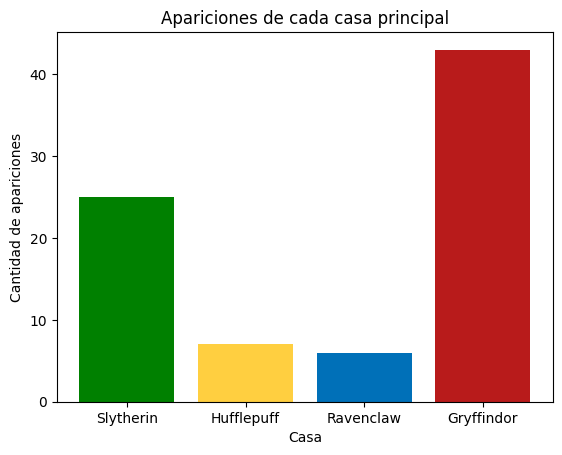

In [29]:
import matplotlib.pyplot as plt

# Etiquetas y valores para el gráfico
etiquetas = list(contador_casas.keys())
valores = list(contador_casas.values())

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=[casas[casa] for casa in etiquetas])

# Añadir título y etiquetas a los ejes
plt.title("Apariciones de cada casa principal")
plt.xlabel("Casa")
plt.ylabel("Cantidad de apariciones")

# Mostrar el gráfico
plt.show()

## ¿En qué frases aparece Revenclaw?

## Obtén los adjetivos que tienen una casa como raíz de la frase



## Obtén las frases en las que aparece cada casa

## Busca los sustantivos más utilizados en el texto

## Divide el libro por capítulos

## Entrena un modelo para detectar las entidades relativas a animales y criaturas fantásticas que aprecen en en libro

## [PA] Ejercicio de participación activa

Plantea una pregunta que requiera utilizar SpaCy, del estilo de las que has resuelto hasta ahora, y presenta la solución.

Para realizar esta presentación, tienes que (obviamente) realizar el código pero **no puedes presentar código**. Lo que harás será 1) plantear una pregunta 2) describir cómo lo has hecho haciendo referencia a los pasos y los tipos de los objetos involucrados 3) presentar los resultados en forma de gráfico, diccionario, lista...

In [ ]:
#Reconocer si una frase en la que aparece un protagonista es positiva, negativa o neutral.

import spacy
from textblob import TextBlob

nlp = spacy.load("es_core_news_md")
doc = nlp(corpus)
personajes_principales = ["Harry", "Ron", "Hermione"]


sentimientos_personajes = []
for personaje in personajes_principales:
    positivas = 0
    negativas = 0
    neutrales = 0

    for sent in doc.sents:
        if personaje in sent.text:
            sentimiento = TextBlob(sent.text).sentiment.polarity
            if sentimiento > 0:
                positivas += 1
            elif sentimiento < 0:
                negativas += 1
            else:
                neutrales += 1

    sentimientos_personajes.append((personaje, positivas, negativas, neutrales))

for personaje, positivas, negativas, neutrales in sentimientos_personajes:
    print(f"{personaje}:")
    print(f"Frases positivas: {positivas}")
    print(f"Frases negativas: {negativas}")
    print(f"Frases neutrales: {neutrales}")
    print()

Harry:
Frases positivas: 2
Frases negativas: 15
Frases neutrales: 1232

Ron:
Frases positivas: 1
Frases negativas: 3
Frases neutrales: 429

Hermione:
Frases positivas: 0
Frases negativas: 3
Frases neutrales: 268



# Enlace con libros:

https://github.com/busiris2014/7506Condor1C2014/tree/master/datos2011/trunk/libros